In [1]:
# Cellule 1 : Documentation et définitions

"""
ALGORITHME FCFS (First Come First Served)
=========================================

Définitions :
- Temps d'arrivée : Moment où le processus arrive dans la file d'attente
- Temps d'exécution (Burst Time) : Durée nécessaire pour exécuter le processus
- Temps de terminaison : Moment où le processus termine son exécution
- Temps de séjour (Turnaround Time) : Temps de terminaison - Temps d'arrivée
- Temps d'attente (Waiting Time) : Temps de séjour - Temps d'exécution
- Temps de réponse (Response Time) : Temps où le processus commence - Temps d'arrivée

Pour FCFS : Temps d'attente = Temps de réponse (pas de préemption)
"""
print("Simulateur d'ordonnancement FCFS initialisé ✓")

Simulateur d'ordonnancement FCFS initialisé ✓


In [3]:
# Cellule 2 : Saisie des données

def saisir_donnees():
    """Fonction pour saisir les informations des processus"""
    
    # Nombre de processus
    n = int(input("Quel est le nombre de processus ? "))
    
    processus = []
    
    print("\n--- Saisie des informations ---")
    for i in range(n):
        print(f"\nProcessus P{i+1}:")
        temps_arrivee = float(input(f"  Temps d'arrivée (secondes) : "))
        temps_execution = float(input(f"  Temps d'exécution (secondes) : "))
        
        processus.append({
            'id': f'P{i+1}',
            'arrivee': temps_arrivee,
            'execution': temps_execution
        })
    
    return processus

# Saisir les données
processus = saisir_donnees()
print("\n✓ Données saisies avec succès!")
print(f"Nombre de processus : {len(processus)}")

Quel est le nombre de processus ?  5



--- Saisie des informations ---

Processus P1:


  Temps d'arrivée (secondes) :  0
  Temps d'exécution (secondes) :  3



Processus P2:


  Temps d'arrivée (secondes) :  1
  Temps d'exécution (secondes) :  6



Processus P3:


  Temps d'arrivée (secondes) :  4
  Temps d'exécution (secondes) :  4



Processus P4:


  Temps d'arrivée (secondes) :  6
  Temps d'exécution (secondes) :  2



Processus P5:


  Temps d'arrivée (secondes) :  7
  Temps d'exécution (secondes) :  1



✓ Données saisies avec succès!
Nombre de processus : 5


In [6]:
# Cellule 3 : Algorithme FCFS

def ordonnancement_fcfs(processus):
    """
    Applique l'algorithme FCFS sur les processus
    """
    # Trier les processus par temps d'arrivée (FCFS)
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    resultats = []
    
    for proc in processus_tries:
        # Le processus attend si le CPU est occupé
        temps_debut = max(temps_courant, proc['arrivee'])
        temps_fin = temps_debut + proc['execution']
        
        # Calculs des temps
        temps_sejour = temps_fin - proc['arrivee']
        temps_attente = temps_sejour - proc['execution']
        temps_reponse = temps_debut - proc['arrivee']  # Pour FCFS = temps_attente
        
        resultats.append({
            'id': proc['id'],
            'arrivee': proc['arrivee'],
            'execution': proc['execution'],
            'debut': temps_debut,
            'fin': temps_fin,
            'sejour': temps_sejour,
            'attente': temps_attente,
            'reponse': temps_reponse
        })
        
        temps_courant = temps_fin
    
    return resultats

# Appliquer l'algorithme
resultats = ordonnancement_fcfs(processus)
print("✓ Ordonnancement FCFS calculé!")

✓ Ordonnancement FCFS calculé!


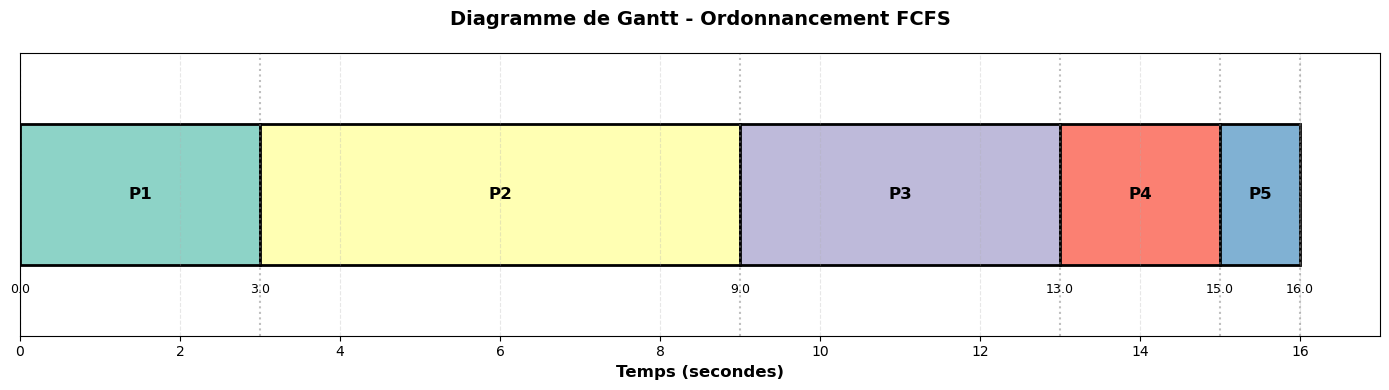

In [7]:
# Cellule 4 : Visualisation - Diagramme de Gantt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def afficher_gantt(resultats):
    """Affiche le diagramme de Gantt"""
    
    fig, ax = plt.subplots(figsize=(14, 4))
    
    # Couleurs différentes pour chaque processus
    couleurs = plt.cm.Set3.colors
    
    for i, proc in enumerate(resultats):
        ax.barh(0, proc['execution'], left=proc['debut'], 
                height=0.5, align='center',
                color=couleurs[i % len(couleurs)],
                edgecolor='black', linewidth=2)
        
        # Ajouter le nom du processus au centre
        centre = proc['debut'] + proc['execution'] / 2
        ax.text(centre, 0, proc['id'], 
                ha='center', va='center', 
                fontweight='bold', fontsize=12)
    
    # Configuration des axes
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlim(0, max([p['fin'] for p in resultats]) + 1)
    ax.set_xlabel('Temps (secondes)', fontsize=12, fontweight='bold')
    ax.set_yticks([])
    ax.set_title('Diagramme de Gantt - Ordonnancement FCFS', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Ajouter les marqueurs de temps
    for proc in resultats:
        ax.axvline(x=proc['debut'], color='gray', linestyle=':', alpha=0.5)
        ax.text(proc['debut'], -0.35, f"{proc['debut']:.1f}", 
                ha='center', fontsize=9)
    
    # Dernier marqueur
    dernier_temps = resultats[-1]['fin']
    ax.axvline(x=dernier_temps, color='gray', linestyle=':', alpha=0.5)
    ax.text(dernier_temps, -0.35, f"{dernier_temps:.1f}", 
            ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

afficher_gantt(resultats)

In [8]:
# Cellule 5 : Affichage des résultats détaillés

import pandas as pd

def afficher_resultats(resultats):
    """Affiche un tableau détaillé des résultats"""
    
    # Créer un DataFrame pour un affichage propre
    df = pd.DataFrame([{
        'Processus': r['id'],
        'Arrivée': f"{r['arrivee']:.1f}",
        'Exécution': f"{r['execution']:.1f}",
        'Début': f"{r['debut']:.1f}",
        'Fin': f"{r['fin']:.1f}",
        'Séjour': f"{r['sejour']:.1f}",
        'Attente': f"{r['attente']:.1f}",
        'Réponse': f"{r['reponse']:.1f}"
    } for r in resultats])
    
    print("="*100)
    print(" "*35 + "RÉSULTATS DE L'ORDONNANCEMENT FCFS")
    print("="*100)
    print(df.to_string(index=False))
    print("="*100)
    
    return df

df_resultats = afficher_resultats(resultats)

                                   RÉSULTATS DE L'ORDONNANCEMENT FCFS
Processus Arrivée Exécution Début  Fin Séjour Attente Réponse
       P1     0.0       3.0   0.0  3.0    3.0     0.0     0.0
       P2     1.0       6.0   3.0  9.0    8.0     2.0     2.0
       P3     4.0       4.0   9.0 13.0    9.0     5.0     5.0
       P4     6.0       2.0  13.0 15.0    9.0     7.0     7.0
       P5     7.0       1.0  15.0 16.0    9.0     8.0     8.0


In [9]:
# Cellule 6 : Statistiques globales

def calculer_statistiques(resultats):
    """Calcule les statistiques moyennes"""
    
    n = len(resultats)
    
    temps_attente_total = sum([r['attente'] for r in resultats])
    temps_reponse_total = sum([r['reponse'] for r in resultats])
    temps_sejour_total = sum([r['sejour'] for r in resultats])
    
    temps_attente_moyen = temps_attente_total / n
    temps_reponse_moyen = temps_reponse_total / n
    temps_sejour_moyen = temps_sejour_total / n
    
    print("\n" + "="*60)
    print(" "*15 + "📊 STATISTIQUES GLOBALES")
    print("="*60)
    print(f"  Nombre de processus          : {n}")
    print(f"  Temps d'attente moyen        : {temps_attente_moyen:.2f} secondes")
    print(f"  Temps de réponse moyen       : {temps_reponse_moyen:.2f} secondes")
    print(f"  Temps de séjour moyen        : {temps_sejour_moyen:.2f} secondes")
    print("="*60)
    
    # Vérification (pour FCFS)
    print("\n✓ Vérification : Temps d'attente = Temps de réponse (FCFS)")
    print(f"  Différence : {abs(temps_attente_moyen - temps_reponse_moyen):.6f}")
    
    return {
        'attente_moyen': temps_attente_moyen,
        'reponse_moyen': temps_reponse_moyen,
        'sejour_moyen': temps_sejour_moyen
    }

stats = calculer_statistiques(resultats)


               📊 STATISTIQUES GLOBALES
  Nombre de processus          : 5
  Temps d'attente moyen        : 4.40 secondes
  Temps de réponse moyen       : 4.40 secondes
  Temps de séjour moyen        : 7.60 secondes

✓ Vérification : Temps d'attente = Temps de réponse (FCFS)
  Différence : 0.000000


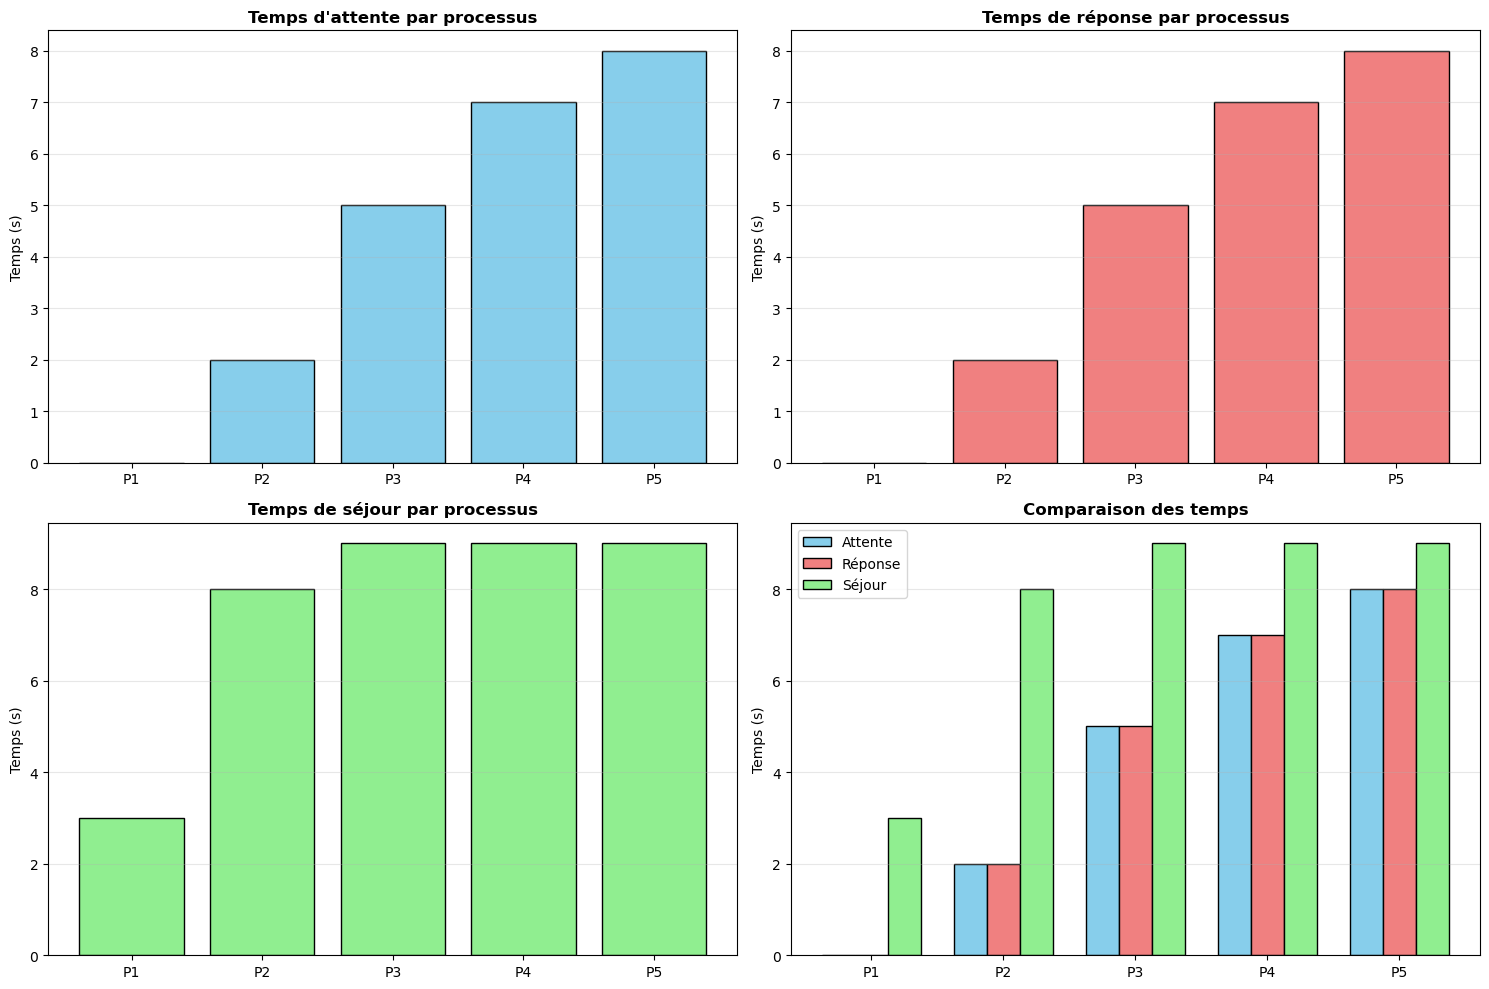

In [10]:
# Cellule 7 : Graphiques comparatifs

def visualiser_temps(resultats):
    """Crée des graphiques pour comparer les différents temps"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    processus_ids = [r['id'] for r in resultats]
    temps_attente = [r['attente'] for r in resultats]
    temps_reponse = [r['reponse'] for r in resultats]
    temps_sejour = [r['sejour'] for r in resultats]
    
    # Graphique 1 : Temps d'attente
    axes[0, 0].bar(processus_ids, temps_attente, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Temps d\'attente par processus', fontweight='bold')
    axes[0, 0].set_ylabel('Temps (s)')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Graphique 2 : Temps de réponse
    axes[0, 1].bar(processus_ids, temps_reponse, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Temps de réponse par processus', fontweight='bold')
    axes[0, 1].set_ylabel('Temps (s)')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Graphique 3 : Temps de séjour
    axes[1, 0].bar(processus_ids, temps_sejour, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Temps de séjour par processus', fontweight='bold')
    axes[1, 0].set_ylabel('Temps (s)')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Graphique 4 : Comparaison globale
    x = range(len(processus_ids))
    width = 0.25
    axes[1, 1].bar([i-width for i in x], temps_attente, width, 
                   label='Attente', color='skyblue', edgecolor='black')
    axes[1, 1].bar(x, temps_reponse, width, 
                   label='Réponse', color='lightcoral', edgecolor='black')
    axes[1, 1].bar([i+width for i in x], temps_sejour, width, 
                   label='Séjour', color='lightgreen', edgecolor='black')
    axes[1, 1].set_title('Comparaison des temps', fontweight='bold')
    axes[1, 1].set_ylabel('Temps (s)')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(processus_ids)
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

visualiser_temps(resultats)